In [39]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
print("setup complete")

setup complete


In [2]:
sales = pd.read_csv('C:/Users/hp/Downloads/possible ts/sales_data_splited_transformed.csv', sep=';', decimal=',',\
                    index_col=0, parse_dates=True)

In [3]:
sales.head()

,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10
2015-02-28,20448,15475,27388,9417,14297,19411,14765,10652,11822,22397
2015-03-31,21370,16911,29115,10266,15293,20555,15632,11374,11686,22376
2015-04-30,20932,16645,27991,10110,15189,20047,15219,10722,10895,20915
2015-05-31,20117,15617,27599,10188,15529,19692,15449,10350,10400,19576
2015-06-30,20663,15863,29692,9906,15992,20557,17329,10695,11600,19952


In [33]:
sales/=5

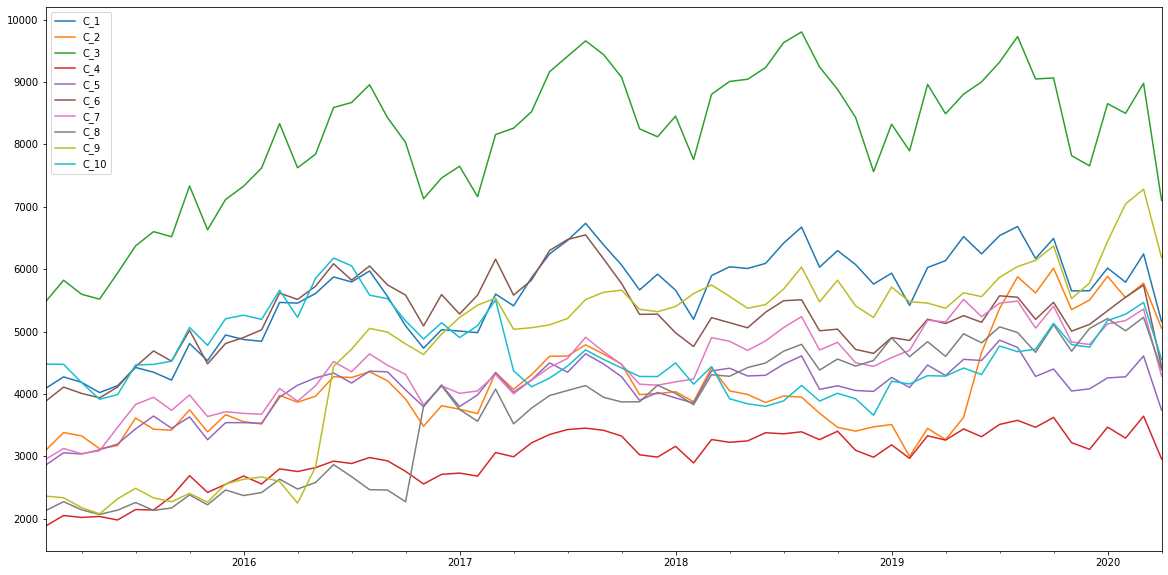

In [34]:
sales.plot(figsize=(20, 10))
plt.show()

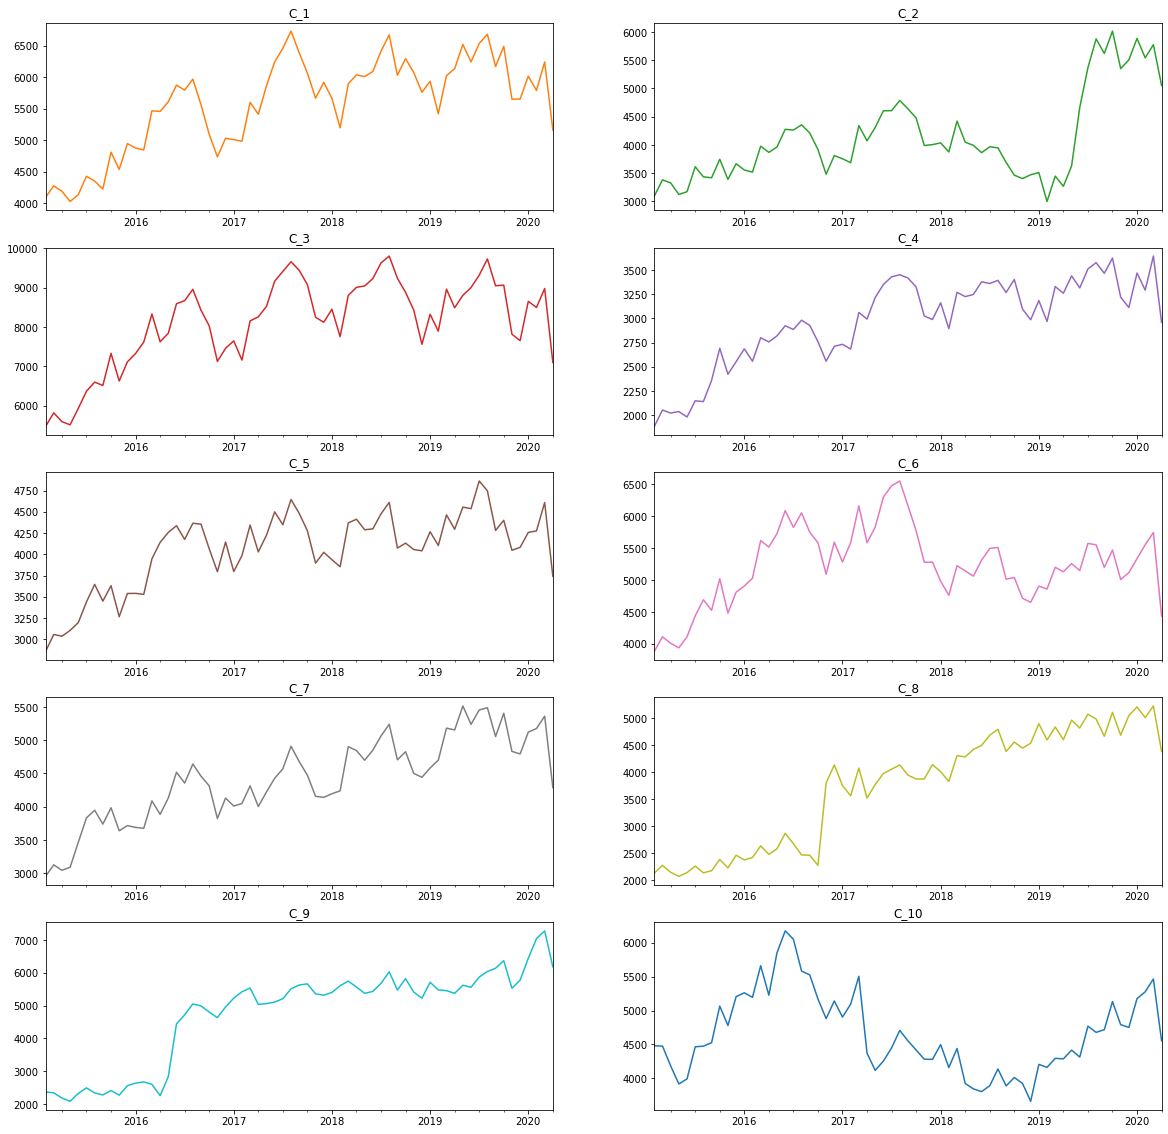

In [45]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
for i, item in enumerate(sales.columns):
    sales[item].plot(title=item,
                     color=next(color_cycle),
                     ax=axs[i])

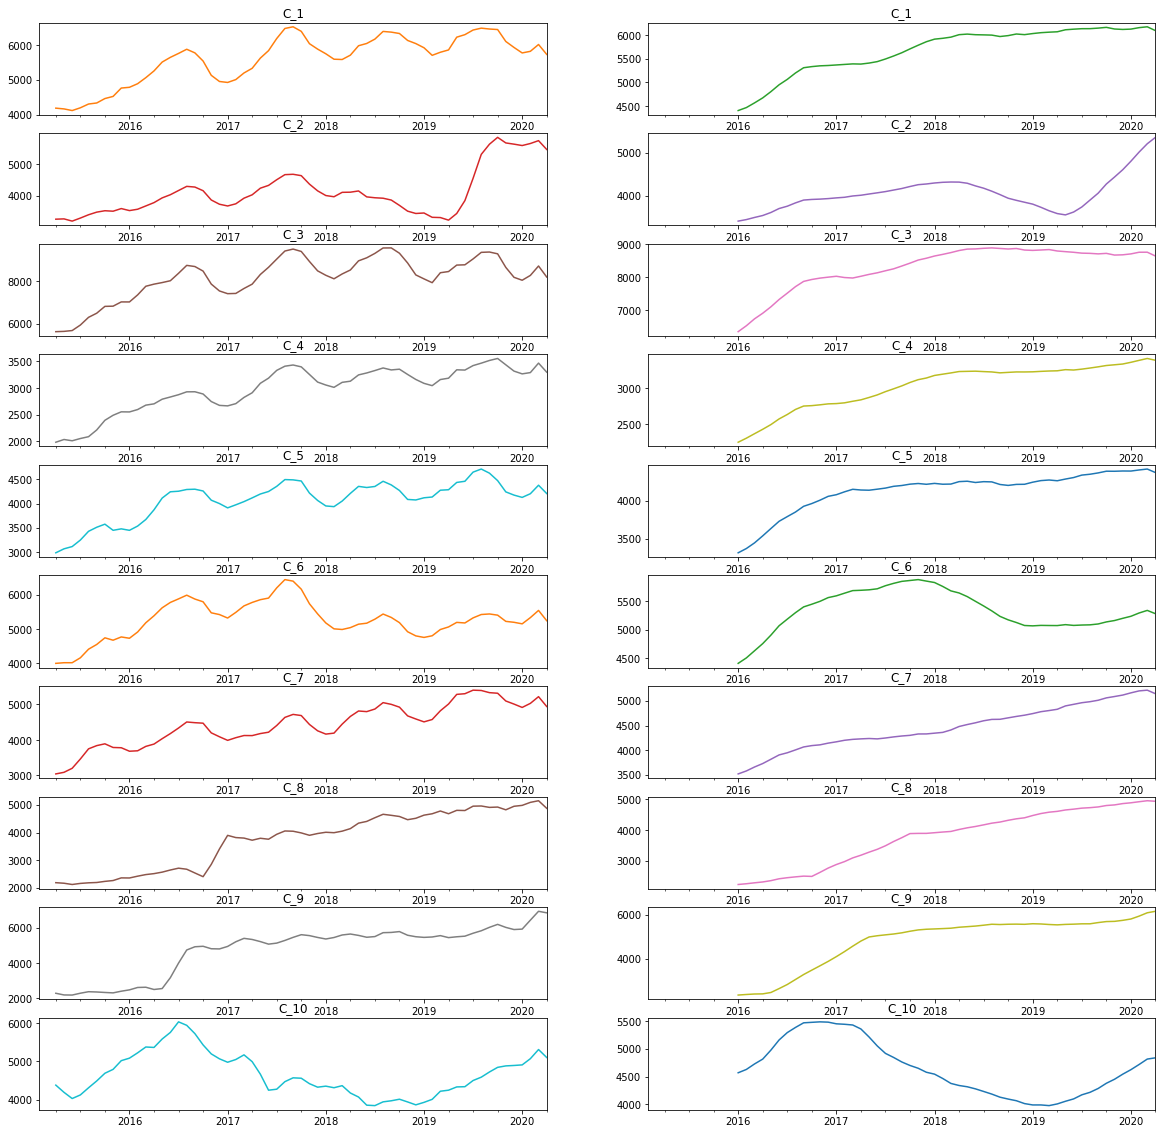

In [50]:
fig, axs = plt.subplots(10, 2, figsize=(20, 20))
axs = axs.flatten()
for i, item in zip(range(0, len(sales), 2), sales.columns):
    sales[item].rolling(3).mean().plot(title=item,
                     color=next(color_cycle),
                     ax=axs[i])
    sales[item].rolling(12).mean().plot(title=item,
                     color=next(color_cycle),
                     ax=axs[i+1])

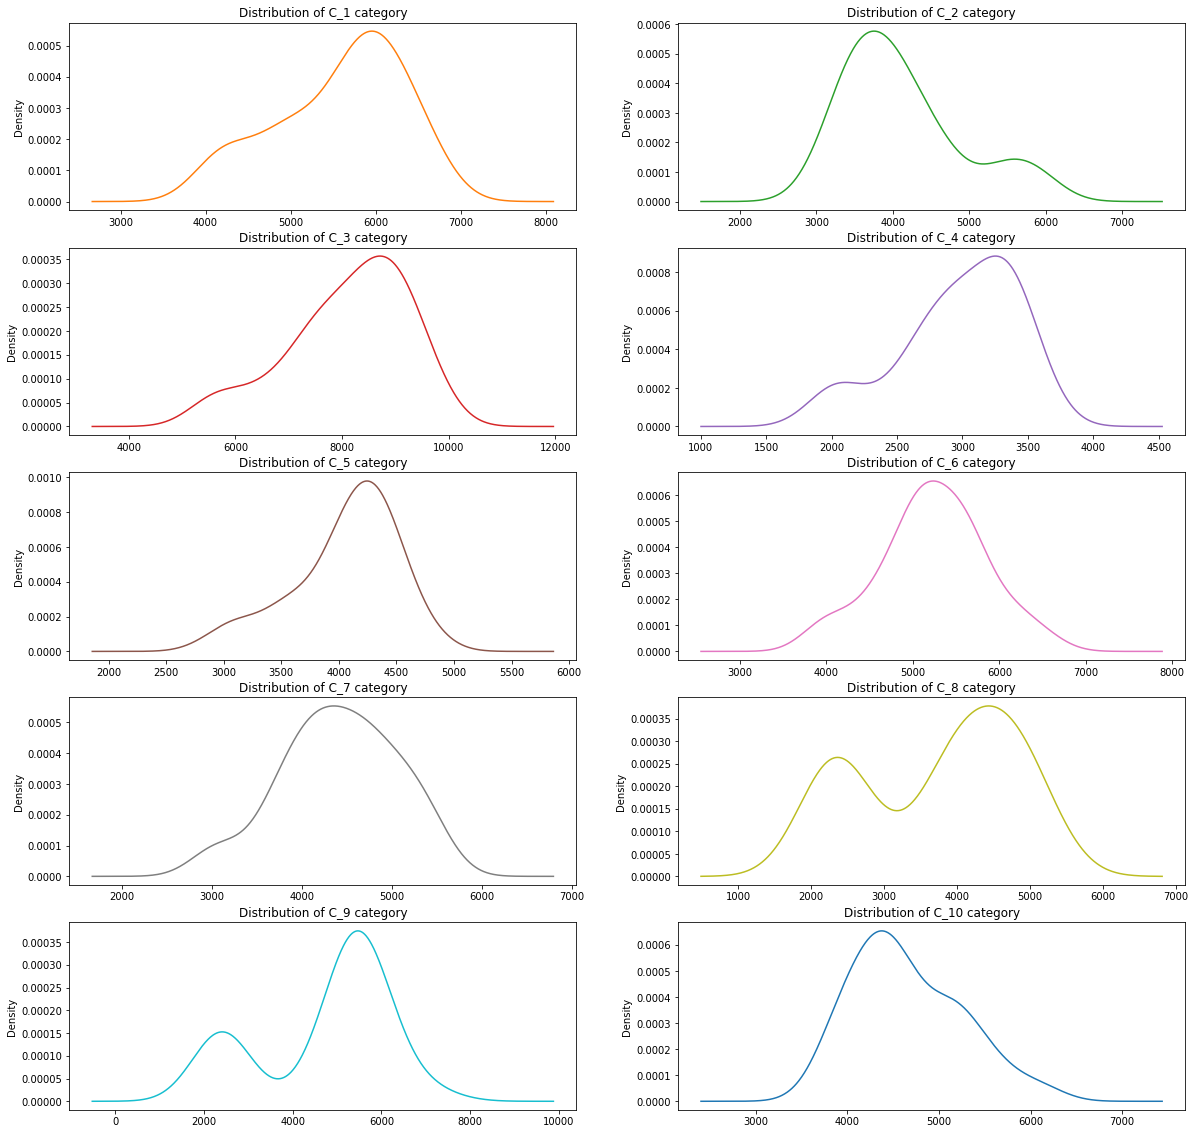

In [56]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
for i, item in enumerate(sales.columns):
    sales[item].plot(kind='density',
                         title=f'Distribution of {item} category',
                     color=next(color_cycle),
                     ax=axs[i])

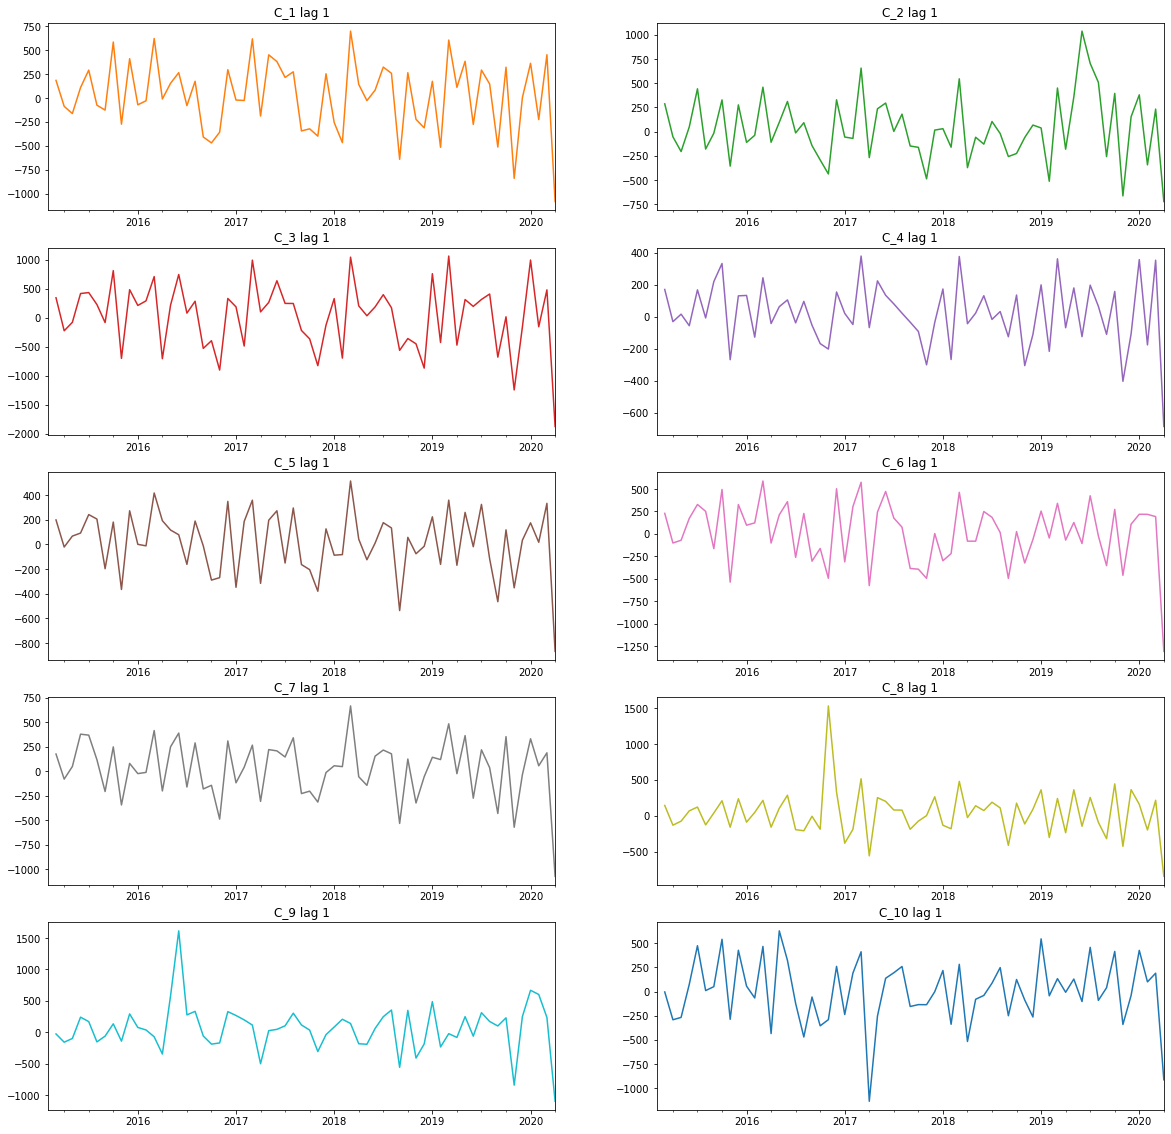

In [58]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
for i, item in enumerate(sales.columns):
    sales[item].diff().plot(title=f"{item} lag 1",
                     color=next(color_cycle),
                     ax=axs[i])

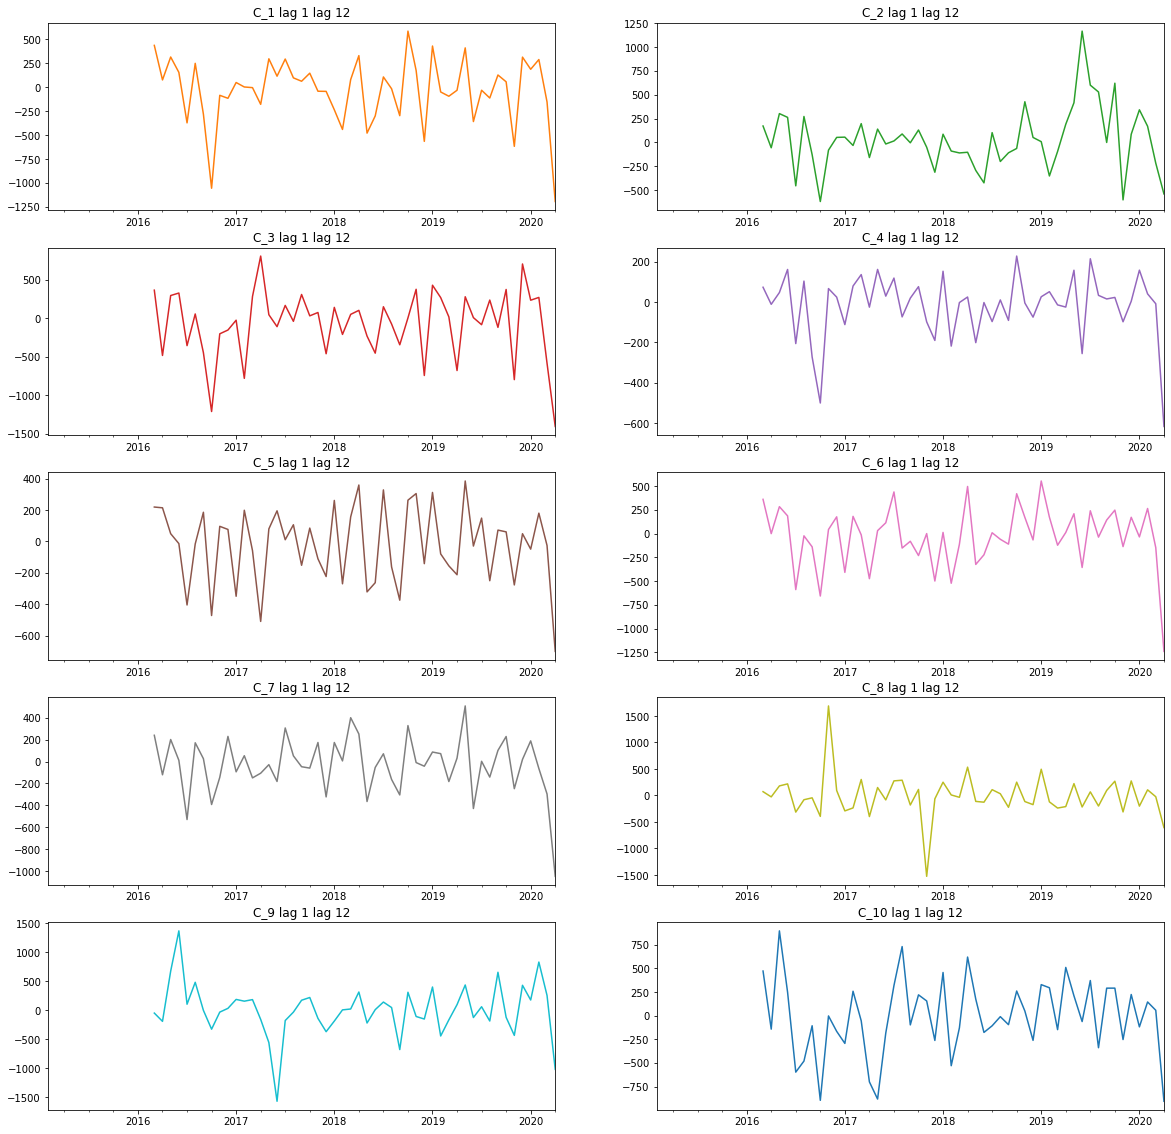

In [63]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
for i, item in enumerate(sales.columns):
    sales[item].diff(1).diff(12).plot(title=f"{item} lag 1 lag 12",
                     color=next(color_cycle),
                     ax=axs[i])

In [65]:
sales.index.month

Int64Index([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
             7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
            12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
             5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4],
           dtype='int64')

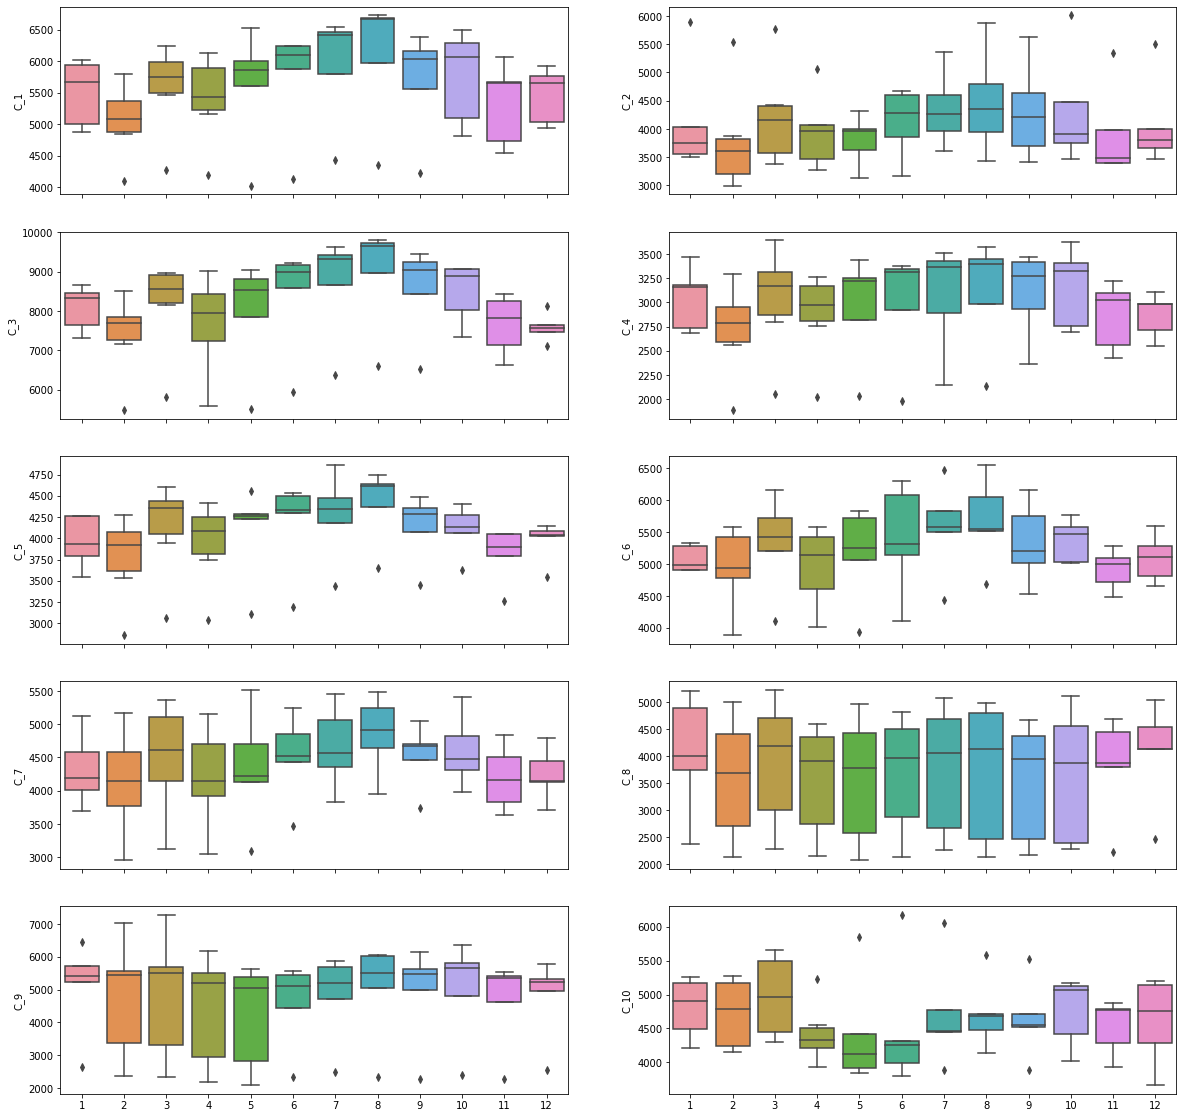

In [72]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
axes = axes.flatten()
for name, ax in zip(sales.columns, axes):
    sns.boxplot(data=sales, x=sales.index.month, y=name, ax=ax)

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

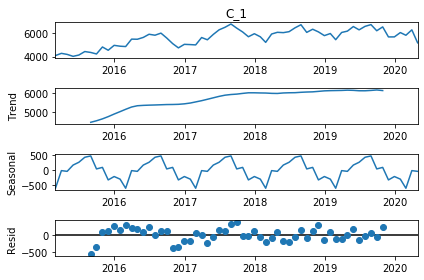

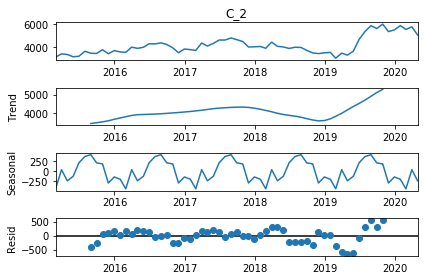

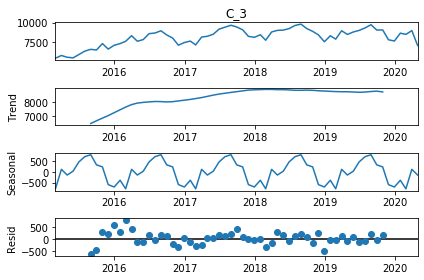

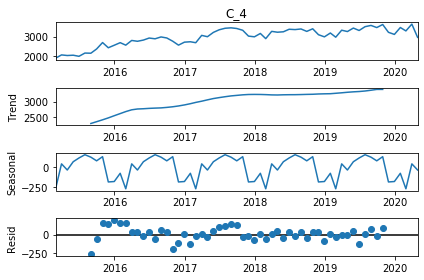

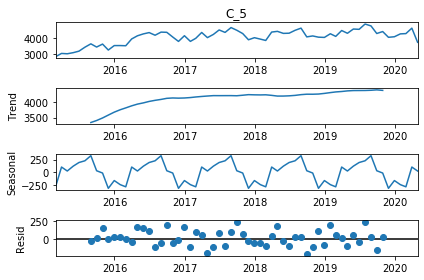

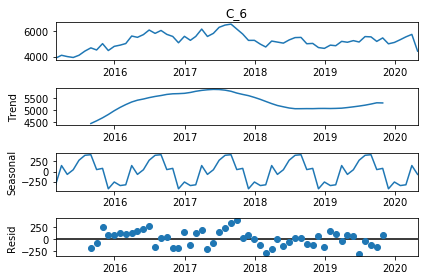

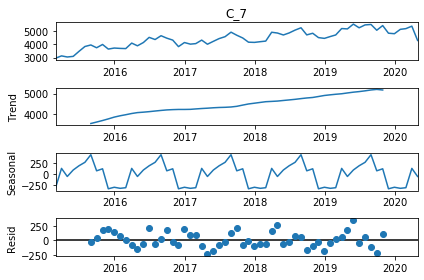

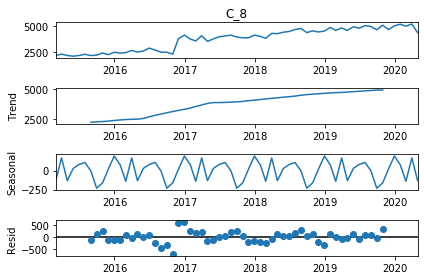

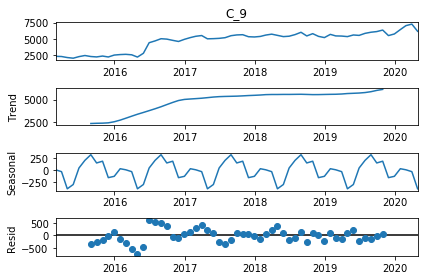

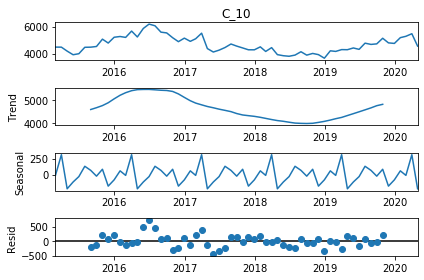

In [101]:
# fig, axes = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
# axes = axes.flatten()
for col in sales.columns:
#     sns.boxplot(data=sales, x=sales.index.month, y=col, ax=ax)
    res = seasonal_decompose(sales[col].dropna(), period=12, filt=None)
#     print(type(res))
    res.plot()
#     res.plot(title=f"{col} lag 1 lag 12",
#                      ax=ax)
    
# result = seasonal_decompose(dfatc_daily['M01AB'].rolling(30, center=True).mean().dropna(), freq=365, filt=None)
# plt.rcParams["figure.figsize"] = (20,20)
# result.plot()
# plt.show()

In [176]:
arr = np.array([1,0,3])
print(arr)
list(map(bool, arr))

[1 0 3]


[True, False, True]

In [181]:
d = pd.DataFrame(None, index=sales.columns, columns=["RESMEAN","OBSMEAN","PERC"], dtype=float)
for col in sales.columns:
    result = seasonal_decompose(sales[col], period=12, model='additive')
    dfs = pd.concat([result.trend, result.seasonal, result.resid, result.observed], axis=1)
    dfs.columns = ['trend', 'seasonal', 'residuals', 'observed']
    dfs=dfs.dropna()
    res=dfs['residuals'].values
    obs=dfs['observed'].values
    d.loc[col][0] = np.mean(np.abs(res))
    d.loc[col][1] = np.mean(np.abs(obs))
    d.loc[col][2] = d.loc[col][0]*100/d.loc[col][1]
d.round(2)

,RESMEAN,OBSMEAN,PERC
C_1,160.48,5722.50,2.80
C_2,196.08,4053.93,4.84
C_3,196.54,8383.39,2.34
C_4,67.47,3051.00,2.21
C_5,90.41,4153.24,2.18
C_6,134.75,5367.26,2.51
C_7,108.83,4489.87,2.42
C_8,173.55,3775.69,4.60
C_9,209.78,4841.56,4.33
C_10,167.65,4664.07,3.59


In [184]:
d = pd.DataFrame(0, index=sales.columns, columns=["RESMEAN","OBSMEAN","PERC"], dtype=float)
for col in sales.columns:
    result = seasonal_decompose(sales[col], period=12, model='additive')

    res=result.resid
    obs=result.observed
#     res, obs = result.resid, result.observed
    d.loc[col][0] = res[~np.isnan(res)].abs().mean()
    d.loc[col][1] = obs[~np.isnan(obs)].abs().mean()
    
#     d.loc[col][:2] = np.mean(np.abs(res)), np.mean(np.abs(obs))
d.PERC = d.RESMEAN*100/d.OBSMEAN
d.round(2)

,RESMEAN,OBSMEAN,PERC
C_1,160.48,5579.33,2.88
C_2,196.08,4120.35,4.76
C_3,196.54,8110.90,2.42
C_4,67.47,2975.05,2.27
C_5,90.41,4056.05,2.23
C_6,134.75,5228.70,2.58
C_7,108.83,4413.76,2.47
C_8,173.55,3732.60,4.65
C_9,209.78,4745.28,4.42
C_10,167.65,4657.03,3.60


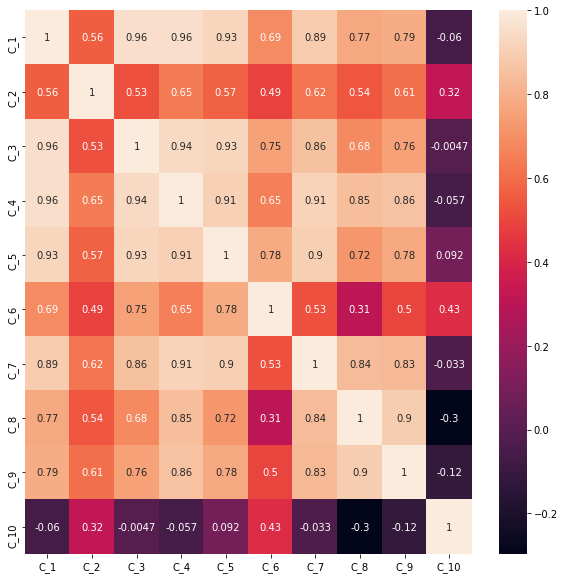

In [186]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(sales.corr(), annot=True)

In [196]:
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf

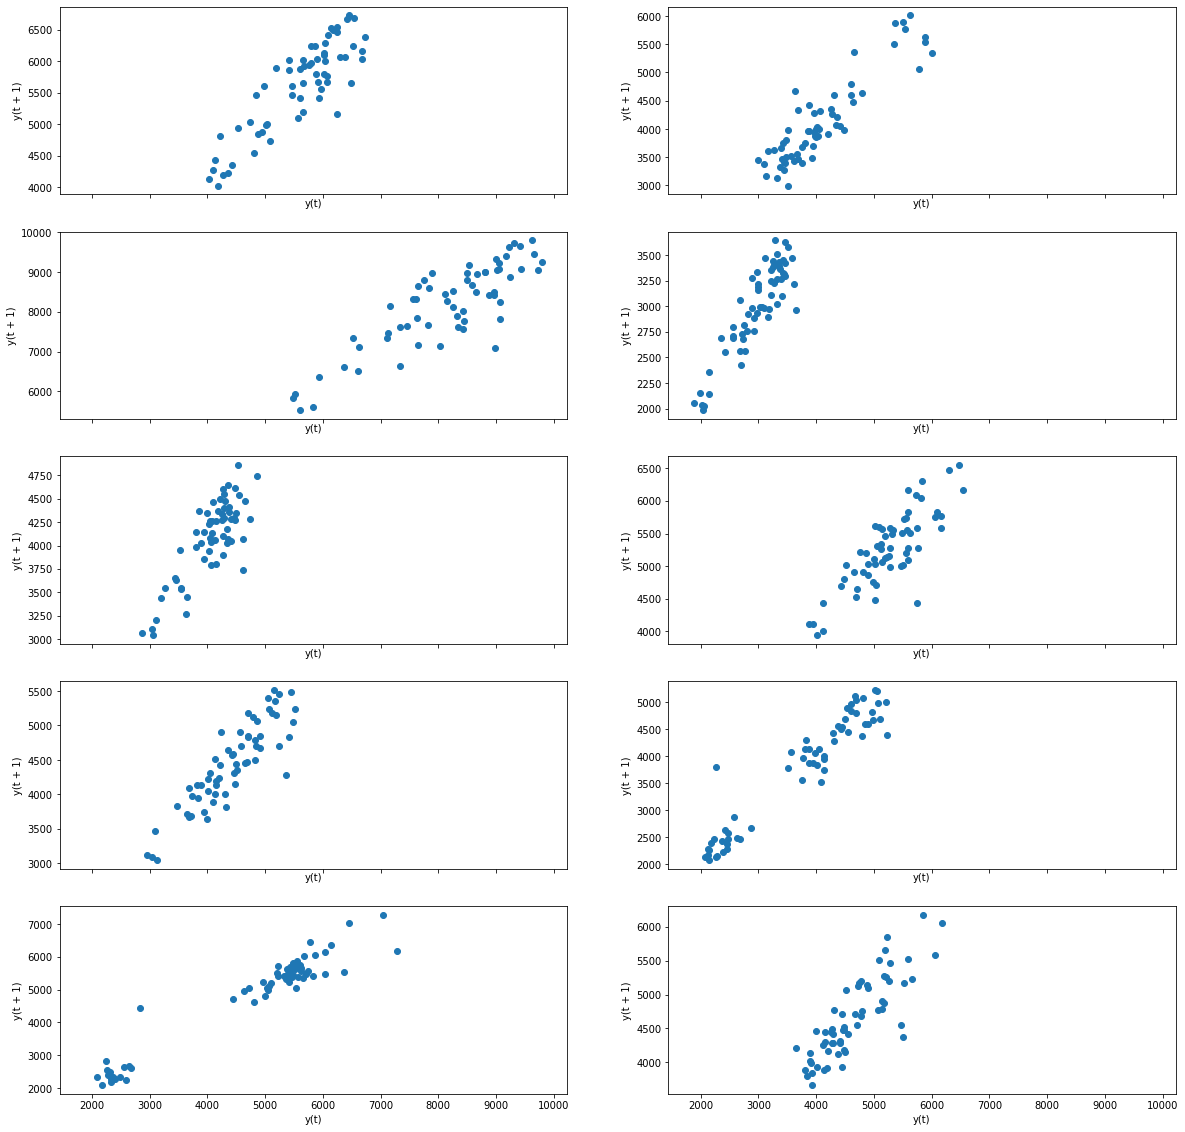

In [192]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
axes = axes.flatten()
for name, ax in zip(sales.columns, axes):
    lag_plot(sales[name], ax=ax)

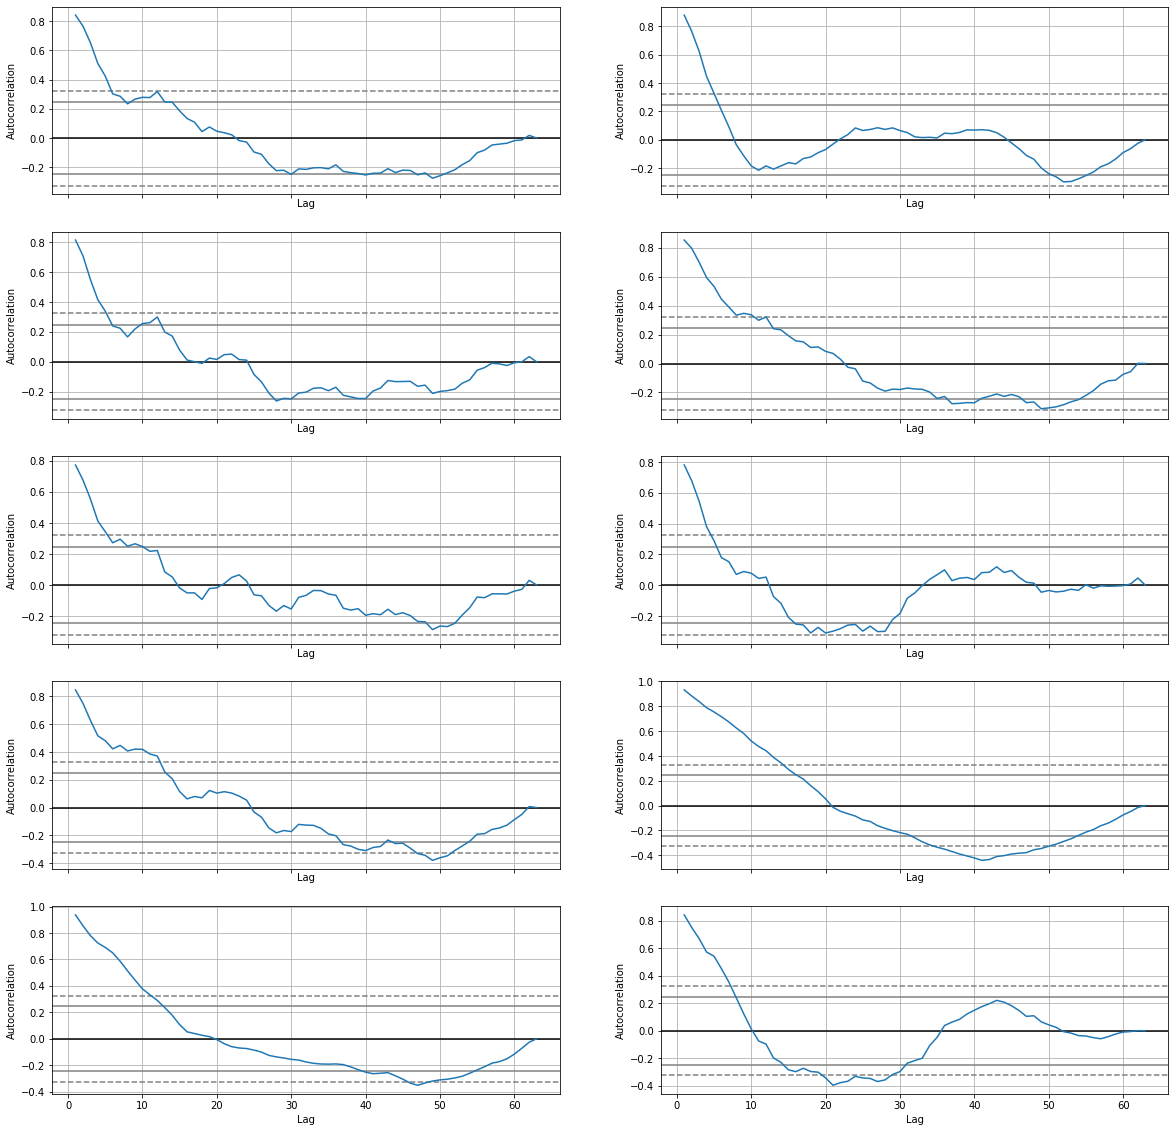

In [195]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
axes = axes.flatten()
for name, ax in zip(sales.columns, axes):
    autocorrelation_plot(sales[name], ax=ax)

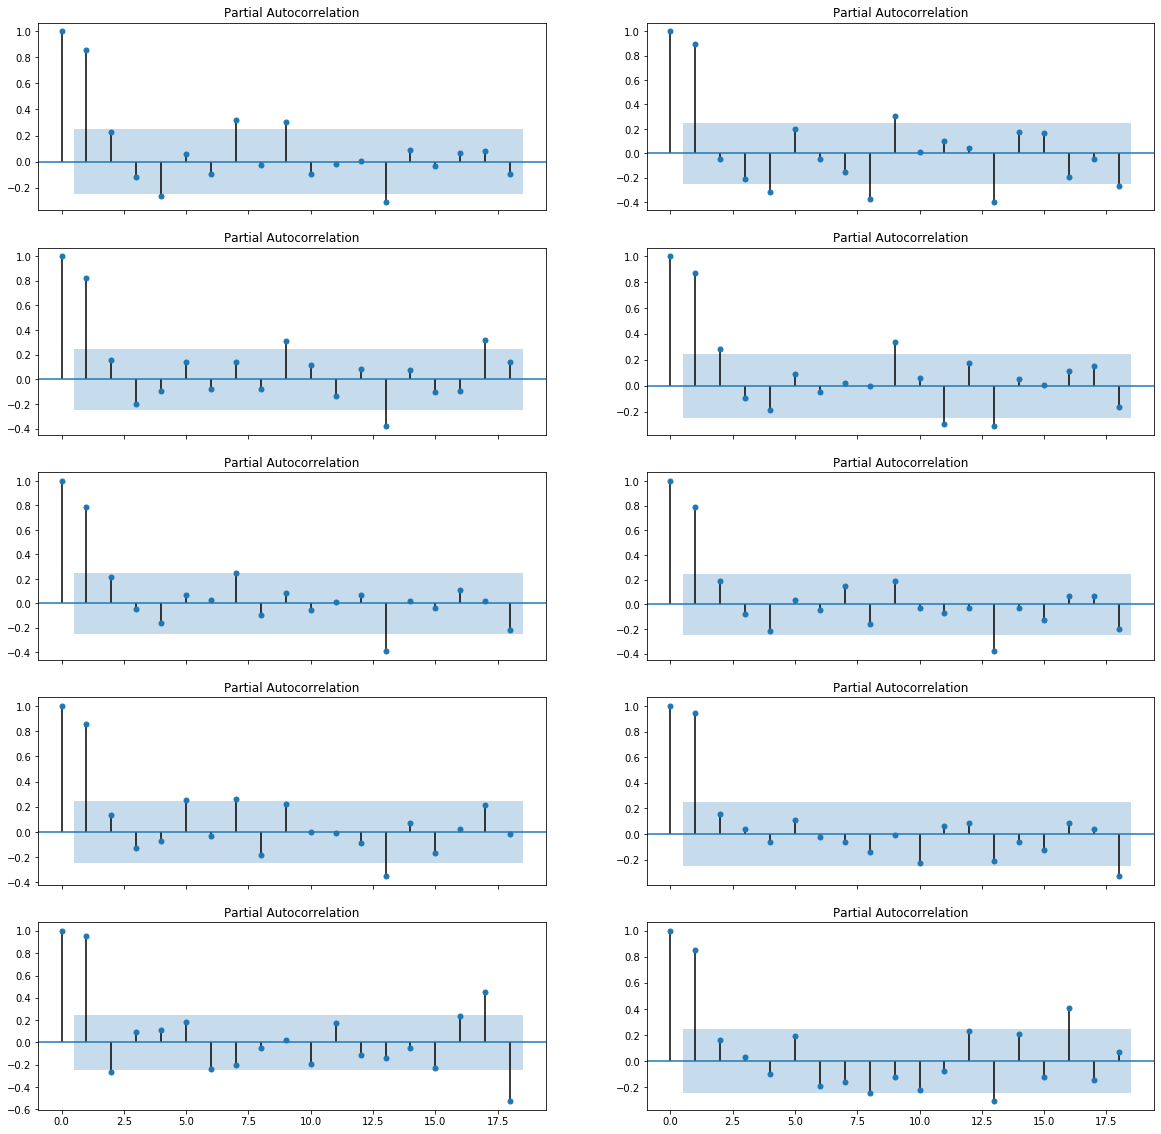

In [197]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
axes = axes.flatten()
for name, ax in zip(sales.columns, axes):
    plot_pacf(sales[name], ax=ax)